In [8]:
import pandas as pd
import numpy as np


data_location = "../data/raw/"

In [9]:
tbprofiler_df = pd.read_json(data_location + "cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,alr_p.Leu113Arg,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,


In [10]:
tbprofiler_df.shape


(2654, 26)

In [11]:
resistance_status_df = tbprofiler_df
resistance_status_df['Resistance_Status'] = resistance_status_df.apply(
    lambda row: 'Sensitive' if (row.drtype == 'Sensitive') else 'Resistant', axis=1)
# resistance_status_df.head()



In [12]:
drugs_column_names = ['rifampicin',
                      'isoniazid',
                      'pyrazinamide',
                      'ethambutol',
                      'streptomycin',
                      'fluoroquinolones',
                      'moxifloxacin',
                      'ofloxacin',
                      'levofloxacin',
                      'ciprofloxacin',
                      'aminoglycosides',
                      'amikacin',
                      'kanamycin',
                      'capreomycin',
                      'ethionamide',
                      'para-aminosalicylic_acid',
                      'cycloserine',
                      'linezolid',
                      'bedaquiline',
                      'clofazimine',
                      'delamanid']

lineage_column_names = ['main_lin', 'sublin']

resistance_status_column_names = ['drtype', 'MDR', 'XDR', 'Resistance_Status']

renamed_drug_columns_names = ['rifampicin_resistance',
                              'isoniazid_resistance',
                              'pyrazinamide_resistance',
                              'ethambutol_resistance',
                              'streptomycin_resistance',
                              'fluoroquinolones_resistance',
                              'moxifloxacin_resistance',
                              'ofloxacin_resistance',
                              'levofloxacin_resistance',
                              'ciprofloxacin_resistance',
                              'aminoglycosides_resistance',
                              'amikacin_resistance',
                              'kanamycin_resistance',
                              'capreomycin_resistance',
                              'ethionamide_resistance',
                              'para-aminosalicylic_acid_resistance',
                              'cycloserine_resistance',
                              'linezolid_resistance',
                              'bedaquiline_resistance',
                              'clofazimine_resistance',
                              'delamanid_resistance']

renamed_drug_columns_names_dict = {
    'rifampicin': 'rifampicin_resistance',
    'isoniazid': 'isoniazid_resistance',
    'pyrazinamide': 'pyrazinamide_resistance',
    'ethambutol': 'ethambutol_resistance',
    'streptomycin': 'streptomycin_resistance',
    'fluoroquinolones': 'fluoroquinolones_resistance',
    'moxifloxacin': 'moxifloxacin_resistance',
    'ofloxacin': 'ofloxacin_resistance',
    'levofloxacin': 'levofloxacin_resistance',
    'ciprofloxacin': 'ciprofloxacin_resistance',
    'aminoglycosides': 'aminoglycosides_resistance',
    'amikacin': 'amikacin_resistance',
    'kanamycin': 'kanamycin_resistance',
    'capreomycin': 'capreomycin_resistance',
    'ethionamide': 'ethionamide_resistance',
    'para-aminosalicylic_acid': 'para-aminosalicylic_acid_resistance',
    'cycloserine': 'cycloserine_resistance',
    'linezolid': 'linezolid_resistance',
    'bedaquiline': 'bedaquiline_resistance',
    'clofazimine': 'clofazimine_resistance',
    'delamanid': 'delamanid_resistance'
}

# In[74]:

In [13]:
resistance_status_df.rename(columns=renamed_drug_columns_names_dict,
                            inplace=True)

resistance_status_df.head()

,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,lineage2,lineage2.2.1,MDR,R,,Resistant
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,,Sensitive
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,,Sensitive
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,lineage2,lineage2.2.1,MDR,R,,Resistant


In [14]:
binarized_resistance_status_df = resistance_status_df

for col_name in renamed_drug_columns_names:
    binarized_resistance_status_df[col_name] = resistance_status_df[col_name].apply(
        lambda resistance: 0 if resistance is '-' else 1)


In [15]:
binarized_resistance_status_df.head()

,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SRR1162996,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR6356985,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,,Resistant
SRR10525347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,,,Sensitive
SRR5153132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,,,Sensitive
SRR10380131,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,,Resistant


In [17]:
binarized_resistance_status_df.shape


(2654, 27)

In [18]:
binarized_resistance_status_df[['Resistance_Status']].head()

,Resistance_Status
SRR1162996,Resistant
SRR6356985,Resistant
SRR10525347,Sensitive
SRR5153132,Sensitive
SRR10380131,Resistant


In [19]:
binarized_resistance_status_df[['Resistance_Status']]

,Resistance_Status
SRR1162996,Resistant
SRR6356985,Resistant
SRR10525347,Sensitive
SRR5153132,Sensitive
SRR10380131,Resistant
...,...
SRR11033604,Sensitive
SRR5153326,Resistant
SRR7516410,Resistant
SRR5153906,Resistant


<AxesSubplot:>

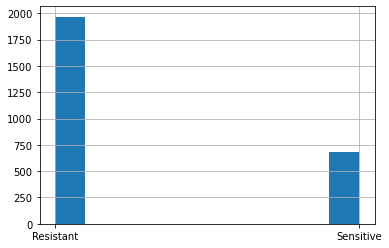

In [21]:
binarized_resistance_status_df['Resistance_Status'].hist()


In [37]:
resistant_genomes = binarized_resistance_status_df[binarized_resistance_status_df['Resistance_Status'] == "Resistant"].index.to_list()
resistant_genomes

['SRR1162996',
 'SRR6356985',
 'SRR10380131',
 'SRR1163399',
 'SRR5153316',
 'SRR10525375',
 'SRR10525332',
 'SRR10380003',
 'SRR3743497',
 'SRR1159279',
 'SRR1163314',
 'SRR5153336',
 'SRR5153723',
 'SRR6458454',
 'ERR067667',
 'SRR7592384',
 'SRR3743385',
 'SRR7516441',
 'SRR10380054',
 'SRR5153095',
 'SRR1163202',
 'SRR1163385',
 'SRR1162535',
 'ERR688013',
 'SRR10397125',
 'SRR1163325',
 'SRR5153216',
 'SRR7516301',
 'SRR10525362',
 'ERR047890',
 'SRR7516435',
 'ERR027459',
 'SRR5153850',
 'SRR10380038',
 'SRR10397192',
 'SRR5153307',
 'SRR6807740',
 'SRR10525369',
 'SRR10380209',
 'SRR5153844',
 'SRR5153226',
 'SRR5153224',
 'SRR6807714',
 'SRR10397173',
 'SRR10380010',
 'SRR10525368',
 'SRR5065238',
 'SRR3743472',
 'SRR6356935',
 'ERR067685',
 'SRR10380096',
 'SRR7655612',
 'SRR1159393',
 'ERR067610',
 'SRR10397256',
 'SRR3743438',
 'SRR6807708',
 'SRR10380047',
 'SRR3743384',
 'SRR1159308',
 'SRR6807762',
 'SRR1162509',
 'SRR7516426',
 'SRR3743203',
 'SRR10397143',
 'SRR5152918'

In [38]:
sensitive_genomes = binarized_resistance_status_df[binarized_resistance_status_df['Resistance_Status'] == "Sensitive"].index.to_list()
sensitive_genomes

['SRR10525347',
 'SRR5153132',
 'SRR10380219',
 'SRR3743482',
 'SRR7516348',
 'SRR5065349',
 'SRR10379991',
 'ERR067606',
 'SRR11033617',
 'SRR11033608',
 'SRR11033680',
 'SRR3743201',
 'SRR10379897',
 'SRR11033666',
 'SRR6356982',
 'ERR067655',
 'SRR1172273',
 'SRR5065302',
 'SRR10397172',
 'SRR5065297',
 'SRR10380115',
 'SRR10397257',
 'SRR3743371',
 'SRR10397169',
 'SRR10380044',
 'SRR5065319',
 'SRR5065364',
 'SRR10379880',
 'SRR10380203',
 'ERR067617',
 'SRR10397202',
 'ERR067706',
 'SRR1163371',
 'SRR11033746',
 'SRR11033676',
 'SRR6807697',
 'SRR10379923',
 'SRR10397195',
 'ERR688008',
 'SRR11033633',
 'SRR10380251',
 'SRR5065369',
 'SRR10380237',
 'SRR7516430',
 'SRR6458461',
 'SRR10380158',
 'SRR11033708',
 'SRR10397163',
 'SRR1163347',
 'SRR10380001',
 'SRR11033602',
 'SRR10380223',
 'SRR6356978',
 'SRR10379958',
 'SRR11033647',
 'SRR5153870',
 'SRR5153073',
 'SRR10380193',
 'ERR067601',
 'ERR027460',
 'SRR5065346',
 'SRR11033630',
 'SRR10380228',
 'SRR11033773',
 'ERR067693'

In [82]:
import json

with open(data_location + "test_train_genome_ids.json") as f:
    all_genomes_ids_dict = json.load(f)

all_genomes_ids_dict


{'tb_portals': ['SRR10379876',
  'SRR10379877',
  'SRR10379878',
  'SRR10379879',
  'SRR10379880',
  'SRR10379881',
  'SRR10379882',
  'SRR10379883',
  'SRR10379884',
  'SRR10379885',
  'SRR10379886',
  'SRR10379887',
  'SRR10379888',
  'SRR10379889',
  'SRR10379890',
  'SRR10379891',
  'SRR10379892',
  'SRR10379893',
  'SRR10379894',
  'SRR10379895',
  'SRR10379896',
  'SRR10379897',
  'SRR10379898',
  'SRR10379899',
  'SRR10379900',
  'SRR10379901',
  'SRR10379902',
  'SRR10379903',
  'SRR10379904',
  'SRR10379905',
  'SRR10379906',
  'SRR10379907',
  'SRR10379908',
  'SRR10379909',
  'SRR10379910',
  'SRR10379911',
  'SRR10379912',
  'SRR10379913',
  'SRR10379914',
  'SRR10379915',
  'SRR10379916',
  'SRR10379917',
  'SRR10379918',
  'SRR10379919',
  'SRR10379920',
  'SRR10379921',
  'SRR10379922',
  'SRR10379923',
  'SRR10379924',
  'SRR10379925',
  'SRR10379926',
  'SRR10379927',
  'SRR10379928',
  'SRR10379929',
  'SRR10379930',
  'SRR10379931',
  'SRR10379932',
  'SRR10379933',


In [48]:
tbportals_genomes = all_genomes_ids_dict['tb_portals']

len(tbportals_genomes)

2153

In [41]:
tbportals_genomes_set = set(tbportals_genomes)

tbportals_genomes_set

{'SRR11033621',
 'SRR5153826',
 'SRR5153609',
 'SRR10397123',
 'SRR10397226',
 'SRR11033694',
 'SRR6807744',
 'SRR5153929',
 'SRR7592352',
 'SRR1159986',
 'SRR11033741',
 'SRR10380225',
 'SRR6384962',
 'SRR7592389',
 'SRR10379973',
 'SRR10397114',
 'SRR5153321',
 'SRR7657753',
 'SRR1163173',
 'SRR5153842',
 'SRR10380168',
 'SRR7592382',
 'SRR5153074',
 'SRR3743386',
 'SRR7516288',
 'SRR7592373',
 'SRR9738541',
 'SRR6807739',
 'SRR11033729',
 'SRR10380203',
 'SRR11033665',
 'SRR1163365',
 'SRR6458443',
 'SRR6807705',
 'SRR6356994',
 'SRR10379986',
 'SRR5153614',
 'SRR10525332',
 'SRR10379932',
 'SRR5486889',
 'SRR10397105',
 'SRR1159310',
 'SRR6356975',
 'SRR3544741',
 'SRR7592348',
 'SRR7516377',
 'SRR10380082',
 'SRR6458449',
 'SRR11033779',
 'SRR1163392',
 'SRR10379880',
 'SRR11033762',
 'SRR10380061',
 'SRR5153076',
 'SRR7516430',
 'SRR6807715',
 'SRR10380019',
 'SRR5153253',
 'SRR3743483',
 'SRR10379897',
 'SRR10397270',
 'SRR1159283',
 'SRR11033689',
 'SRR10379957',
 'SRR5153918',

In [49]:
htbc_genomes = set(all_genomes_ids_dict['htbc'])

len(htbc_genomes)


501

In [44]:
htbc_genomes_set = set(htbc_genomes)

In [68]:
htbc_resistant_genomes = list(htbc_genomes_set.intersection(resistant_genomes))
len(htbc_resistant_genomes)


338

In [69]:
htbc_sensitive_genomes = list(htbc_genomes_set.intersection(sensitive_genomes))
len(htbc_sensitive_genomes)

163

In [70]:
tbportals_resistant_genomes  = list(tbportals_genomes_set.intersection(resistant_genomes))
len(tbportals_resistant_genomes[830:])

800

In [71]:
tbportals_sensitive_genomes = list(tbportals_genomes_set.intersection(sensitive_genomes))
len(tbportals_sensitive_genomes)

523

In [73]:
final_htbc_test_genome_ids = htbc_resistant_genomes + htbc_sensitive_genomes
len(final_htbc_test_genome_ids)

501

In [80]:

final_tbportals_train_genome_ids = tbportals_resistant_genomes[830:] + tbportals_sensitive_genomes[100:]
len(final_tbportals_train_genome_ids)


1223

In [83]:
all_genomes_ids_dict['final_tbportals_train_genomes'] = final_tbportals_train_genome_ids
all_genomes_ids_dict.keys()



dict_keys(['tb_portals', 'htbc', 'final_tbportals_train_genomes'])

In [84]:
all_genomes_ids_dict['final_htbc_test_genomes'] = final_htbc_test_genome_ids

all_genomes_ids_dict.keys()

dict_keys(['tb_portals', 'htbc', 'final_tbportals_train_genomes', 'final_htbc_test_genomes'])

In [86]:

import json

with open(data_location + "test_train_genome_ids.json", "w") as f:
    json.dump(all_genomes_ids_dict, f, indent= 4)
